# Part-II: Decision Trees 

# Task 4: Conceptual Questions

Answer briefly: 
1. What is entropy and information gain? 
* Entropy measures the impurity or disorder in a dataset whereas information gain quantifies the reduction in entropy caused by partitioning the data according to a given feature.

2. Explain the difference between Gini Index and Entropy. 
* Gini Index: It measures impurity as the probability of misclassifying a randomly chosen element.Ranges from 0 to 0.5 for binary classification.Simpler and faster to compute.
* Entropy: It uses a logarithmic scale to measure impurity.Ranges from 0 to 1.It is computationally heavier due to the log function.

3. How can a decision tree overfit? How can this be avoided?
* Overfitting happens when the tree becomes too complex and fits noise in the training data.To prevent overfitting use pruning, limit tree depth or set a minimum number of samples for splits.

# Task 5: Decision Tree on Titanic Dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df = pd.read_csv('Titanic.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# drop the column which has most null values
df = df.drop(columns=['Cabin'],axis=1)

# drop of null or missing values
df.dropna(inplace=True)

In [5]:
# encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

In [6]:
X = df[['Pclass','Sex','Age','Fare']]
y = df['Survived']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
clf = DecisionTreeClassifier(max_leaf_nodes=30,random_state=42)
clf.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,30
,min_impurity_decrease,0.0
,class_weight,None


In [37]:
y_pred = clf.predict(X_test)

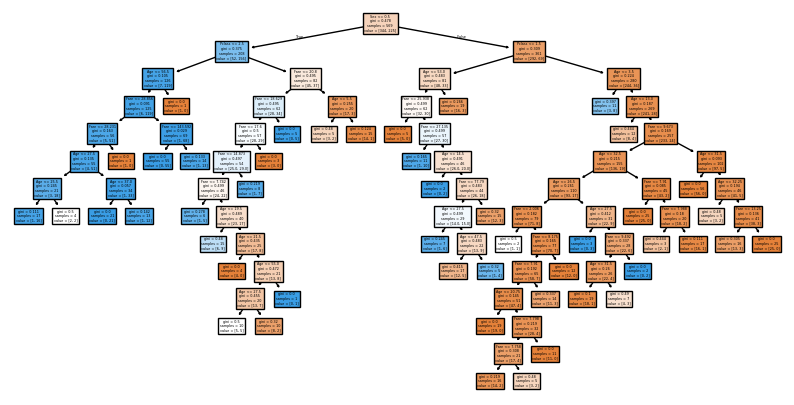

In [43]:
plt.figure(figsize=(10,5))
# plot_tree(clf)
plot_tree(clf, feature_names=['Pclass','Sex','Age','Fare'], filled=True)
plt.show()

In [39]:
# evaluation
print("Accuracy:        ",accuracy_score(y_test, y_pred))
print("Confusion matrix: \n",confusion_matrix(y_test, y_pred))

Accuracy:         0.7342657342657343
Confusion matrix: 
 [[70 10]
 [28 35]]


# Task 6: Model Tuning

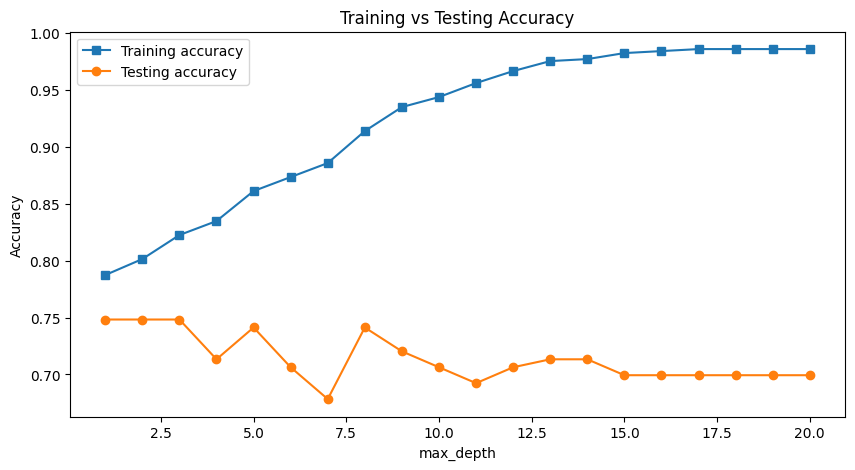

In [40]:
# tuning altering max_depth
train = []
test = []
depths = range(1, 21)

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train.append(clf.score(X_train, y_train))
    test.append(clf.score(X_test, y_test))


# visualization
plt.figure(figsize=(10, 5))
plt.plot(depths, train, marker='s',label='Training accuracy')
plt.plot(depths, test, marker='o',label='Testing accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.legend()
plt.show()


* Here on increasing depth the training accuracy increases but testing accuracy decreases. So the model is overfitting.

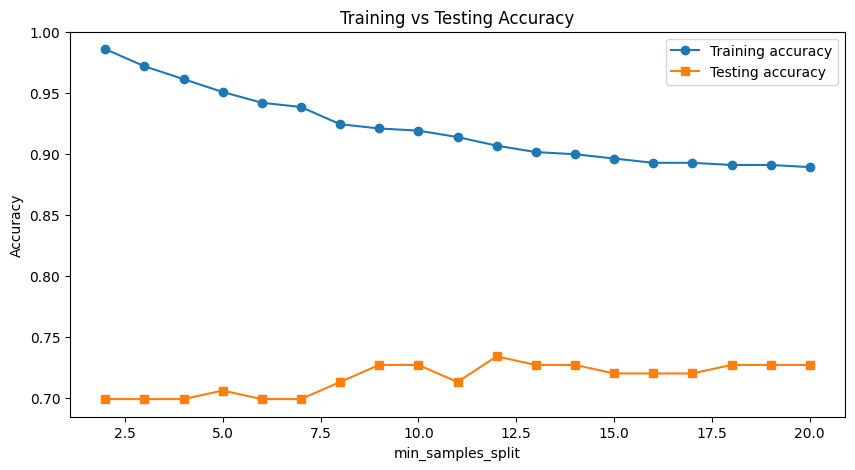

In [41]:
# tuning altering min_samples_split
train_ = []
test_ = []
split = range(2, 21)

for s in split:
    clf = DecisionTreeClassifier(min_samples_split=s, random_state=42)
    clf.fit(X_train, y_train)
    train_.append(clf.score(X_train, y_train))
    test_.append(clf.score(X_test, y_test))

# visualization
plt.figure(figsize=(10, 5))
plt.plot(split, train_, marker='o',label='Training accuracy')
plt.plot(split, test_, marker='s',label='Testing accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.legend()
plt.show()


* Here lower training accuracy but better testing accuracy on increasing split values.